In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [2]:
N_avg = np.genfromtxt("Functions/Result/N_avg.csv", delimiter = ',')/100
N_std = np.genfromtxt("Functions/Result/N_std.csv", delimiter = ',')/100
N_std[N_std == 0] = 1e-5

In [3]:
def func(x, a, b):
    return a*x + b

In [4]:
xdata = np.linspace(1,50,50)/100

In [5]:
a = []
b = []
ea = []
eb = []

In [6]:
ab, pcov = curve_fit(func, xdata[1:15], N_avg[1:15], sigma = N_std[1:15])
a.append(ab[0])
b.append(ab[1])
ea.append(np.sqrt(pcov[0,0]))
eb.append(np.sqrt(pcov[1,1]))

In [7]:
ab, pcov = curve_fit(func, xdata[14:22], N_avg[14:22], sigma = N_std[14:22])
a.append(ab[0])
b.append(ab[1])
ea.append(np.sqrt(pcov[0,0]))
eb.append(np.sqrt(pcov[1,1]))

In [8]:
ab, pcov = curve_fit(func, xdata[21:25], N_avg[21:25], sigma = N_std[21:25])
a.append(ab[0])
b.append(ab[1])
ea.append(np.sqrt(pcov[0,0]))
eb.append(np.sqrt(pcov[1,1]))

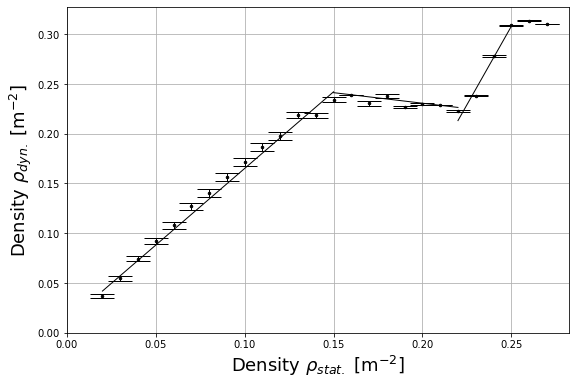

In [9]:


fig = plt.figure(figsize = (9,6))
ax = plt.axes()
ax.errorbar(xdata, N_avg, N_std, capsize = 12, elinewidth = 1, c = 'k', marker = '.', markersize = 5, linewidth = 0)
ax.plot(xdata[1:15], func(xdata[1:15], a[0], b[0]), c='k', linewidth = 1)
ax.plot(xdata[14:22], func(xdata[14:22], a[1], b[1]), c='k', linewidth = 1)
ax.plot(xdata[21:25], func(xdata[21:25], a[2], b[2]), c='k', linewidth = 1)
ax.grid(True)
ax.set_xlabel(r"Density $\rho_{stat.}$ [m$^{-2}$]", size = 18)
ax.set_ylabel(r"Density $\rho_{dyn.}$ [m$^{-2}$]", size = 18)
ax.set_xlim(0)
ax.set_ylim(0)

fig.savefig("phase_transition.png")

In [10]:
for i in range(3):
    print(f"({round(a[i],3)} ± {round(ea[i],3)}) rho + ({round(b[i],3)} ± {round(eb[i],4)})")

(1.54 ± 0.035) rho + (0.011 ± 0.0031)
(-0.212 ± 0.001) rho + (0.273 ± 0.0002)
(3.156 ± 0.317) rho + (-0.481 ± 0.0758)
